# 🎓 Bayesian Starter - เรียนรู้ทำ Thompson Sampling ด้วยตัวเอง

**ผู้เขียน**: Hamdee Naseng  
**วันที่**: 3 พฤศจิกายน 2025  
**วัตถุประสงค์**: สอนทำ Thompson Sampling ทีละขั้นตอน เติม TODO ให้สมบูรณ์

---

## 🎯 โค้ดนี้ต่างจากโค้ดอื่นอย่างไร?

**`bayesian_starter.py`** = โค้ดแบบฝึกหัด มี **TODO** ให้เติม  
**`bayesian_bandit.py`** = โค้ดสมบูรณ์ ใช้เรียนรู้แนวคิด

### 📝 TODO ที่ต้องเติม (5 จุด):
1. ✏️ กำหนดค่าเริ่มต้น `a`, `b` ใน `__init__()`
2. ✏️ สุ่มค่าจาก Beta distribution ใน `sample()`
3. ✏️ อัพเดท `a` ใน `update()`
4. ✏️ อัพเดท `b` ใน `update()`
5. ✏️ เลือก bandit ที่ดีที่สุดด้วย Thompson Sampling

---

## 📦 Step 1: Import และตั้งค่า

ก่อนอื่นเรา import library และตั้งค่า font สำหรับภาษาไทย

In [1]:
# Import library พื้นฐาน
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# ตั้งค่า font สำหรับภาษาไทย
import matplotlib.font_manager as fm

font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

print("✅ Import สำเร็จ!")
print(f"✅ ตั้งค่า Font ภาษาไทยเป็น '{font_name}' เรียบร้อย")

✅ Import สำเร็จ!
✅ ตั้งค่า Font ภาษาไทยเป็น 'Prompt' เรียบร้อย


## 🎰 Step 2: สร้าง Class Bandit (มี TODO)

### TODO #1-2: กำหนดค่าเริ่มต้น a, b

**คำถาม**: ควรให้ `a` และ `b` เท่าไหร่?

**คำตอบ**: `a = 1, b = 1` (Beta(1,1) = Uniform distribution)
- หมายถึง: เราไม่รู้อะไรเลย เชื่อว่าความน่าจะเป็นทุกค่า (0-1) มีโอกาสเท่ากัน
- นี่คือ **uninformative prior** (prior ที่ไม่ลำเอียง)

In [2]:
class Bandit:
    def __init__(self, p):
        self.p = p          # ความน่าจะเป็นจริง
        self.a = 1          # TODO #1: เริ่มต้นด้วย a = 1
        self.b = 1          # TODO #2: เริ่มต้นด้วย b = 1
        self.N = 0          # จำนวนครั้งที่เล่น
    
    def pull(self):
        """ลองเล่นเครื่อง ได้ True (ชนะ) หรือ False (แพ้)"""
        return np.random.random() < self.p
    
    def sample(self):
        """สุ่มทายความน่าจะเป็นจาก Beta distribution"""
        # TODO #3: สุ่มจาก Beta(a, b)
        return beta.rvs(self.a, self.b)
    
    def update(self, x):
        """อัพเดทความเชื่อหลังได้ผล x (True/False)"""
        # TODO #4: ถ้าชนะ (x=True) ให้เพิ่ม a
        # TODO #5: ถ้าแพ้ (x=False) ให้เพิ่ม b
        self.a += x         # x=1 ถ้าชนะ, x=0 ถ้าแพ้
        self.b += (1 - x)   # 1-x=0 ถ้าชนะ, 1-x=1 ถ้าแพ้
        self.N += 1

print("✅ สร้าง Class Bandit เรียบร้อย!")

✅ สร้าง Class Bandit เรียบร้อย!


## 🧪 Step 3: ทดสอบ Class Bandit

มาลองสร้าง bandit 1 ตัวและทดสอบฟังก์ชันต่าง ๆ

In [10]:
# สร้าง bandit ที่มีโอกาสชนะ 50%
test_bandit = Bandit(p=0.5)

print("🎰 ทดสอบ Bandit (p=0.5)")
print(f"\n📊 ก่อนเล่น:")
print(f"  a = {test_bandit.a}, b = {test_bandit.b}")
print(f"  N = {test_bandit.N}")

# ลองเล่น 5 ครั้ง
print("\n🎲 ทดลองเล่น 5 ครั้ง:")
for i in range(5):
    result = test_bandit.pull()
    test_bandit.update(result)
    print(f"  ครั้งที่ {i+1}: {'🎉 ชนะ!' if result else '❌ แพ้'} → a={test_bandit.a}, b={test_bandit.b}")

print(f"\n📊 หลังเล่น 5 ครั้ง:")
print(f"  a = {test_bandit.a}, b = {test_bandit.b}")
print(f"  Win rate ที่สังเกตได้ = {(test_bandit.a-1)}/{test_bandit.N} = {(test_bandit.a-1)/test_bandit.N:.2%}")

# ทดสอบ sample
print("\n🎲 ทดสอบ sample() 5 ครั้ง:")
for i in range(5):
    sampled = test_bandit.sample()
    print(f"  ครั้งที่ {i+1}: ทายว่า p = {sampled:.3f}")

🎰 ทดสอบ Bandit (p=0.5)

📊 ก่อนเล่น:
  a = 1, b = 1
  N = 0

🎲 ทดลองเล่น 5 ครั้ง:
  ครั้งที่ 1: ❌ แพ้ → a=1, b=2
  ครั้งที่ 2: 🎉 ชนะ! → a=2, b=2
  ครั้งที่ 3: ❌ แพ้ → a=2, b=3
  ครั้งที่ 4: 🎉 ชนะ! → a=3, b=3
  ครั้งที่ 5: 🎉 ชนะ! → a=4, b=3

📊 หลังเล่น 5 ครั้ง:
  a = 4, b = 3
  Win rate ที่สังเกตได้ = 3/5 = 60.00%

🎲 ทดสอบ sample() 5 ครั้ง:
  ครั้งที่ 1: ทายว่า p = 0.451
  ครั้งที่ 2: ทายว่า p = 0.631
  ครั้งที่ 3: ทายว่า p = 0.627
  ครั้งที่ 4: ทายว่า p = 0.655
  ครั้งที่ 5: ทายว่า p = 0.746


## 📊 Step 4: ฟังก์ชัน plot - แสดงกราฟ Beta Distribution

ฟังก์ชันนี้ใช้แสดง posterior distribution ของแต่ละ bandit

In [4]:
def plot(bandits, trial):
    """วาดกราฟ Beta distribution ของทุก bandits"""
    x = np.linspace(0, 1, 200)
    plt.figure(figsize=(12, 6))
    
    for i, b in enumerate(bandits):
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Bandit {i+1}: p={b.p:.0%}, ชนะ {b.a-1}/{b.N}", linewidth=2)
    
    plt.xlabel('ความน่าจะเป็น', fontsize=12)
    plt.ylabel('ความเชื่อมั่น', fontsize=12)
    plt.title(f'Beta Distribution หลังเล่น {trial} รอบ', fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

print("✅ สร้างฟังก์ชัน plot เรียบร้อย!")

✅ สร้างฟังก์ชัน plot เรียบร้อย!


## 🚀 Step 5: ฟังก์ชัน experiment (มี TODO สำคัญ!)

### TODO #6: Thompson Sampling

**คำถาม**: จะเลือก bandit ไหนเล่น?

**คำตอบ**: ใช้ Thompson Sampling!
1. สุ่มทาย (sample) ความน่าจะเป็นของทุก bandits
2. เลือก bandit ที่สุ่มได้สูงสุด

**โค้ด**: `j = np.argmax([b.sample() for b in bandits])`

In [5]:
def experiment():
    """รันการทดลอง Thompson Sampling เต็มรูปแบบ"""
    
    # กำหนดค่าคงที่
    NUM_TRIALS = 2000
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
    
    # สร้าง bandits
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    # จุดที่จะแสดงกราฟ
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)
    
    # เล่น NUM_TRIALS รอบ
    for i in range(NUM_TRIALS):
        # TODO #6: Thompson Sampling - เลือก bandit ที่ sample ได้สูงสุด
        j = np.argmax([b.sample() for b in bandits])
        
        # แสดงกราฟในจุดที่กำหนด
        if i in sample_points:
            plot(bandits, i)
        
        # เล่น bandit ที่เลือก
        x = bandits[j].pull()
        
        # บันทึกรางวัล
        rewards[i] = x
        
        # อัพเดทความเชื่อ
        bandits[j].update(x)
    
    # แสดงผลสรุป
    print("\n" + "="*60)
    print("📊 สรุปผลการทดลอง")
    print("="*60)
    print(f"💰 รางวัลรวมทั้งหมด: {rewards.sum():.0f}")
    print(f"📈 Win rate โดยรวม: {rewards.sum() / NUM_TRIALS:.2%}")
    print(f"\n🎰 จำนวนครั้งที่เลือกแต่ละ Bandit:")
    for i, b in enumerate(bandits):
        print(f"  Bandit {i+1} (p={b.p:.0%}): {b.N} ครั้ง ({b.N/NUM_TRIALS:.1%})")
    
    print("\n💡 สังเกต: Bandit 3 (p=75%) ควรถูกเลือกมากที่สุด!")
    print("="*60)

print("✅ สร้างฟังก์ชัน experiment เรียบร้อย!")

✅ สร้างฟังก์ชัน experiment เรียบร้อย!


## 🎮 Step 6: รันการทดลอง!

ตอนนี้เรามีโค้ดครบแล้ว มารันดูกัน!

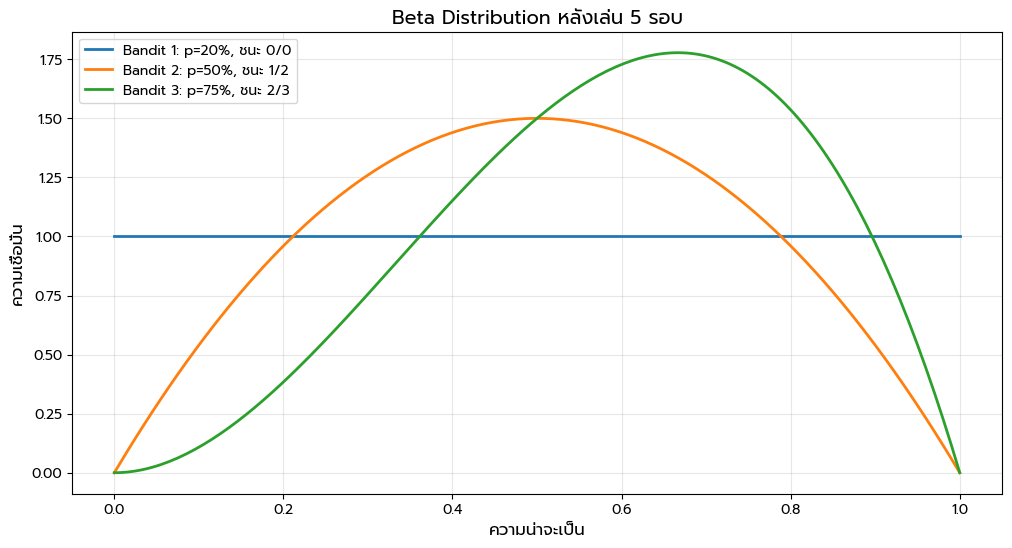

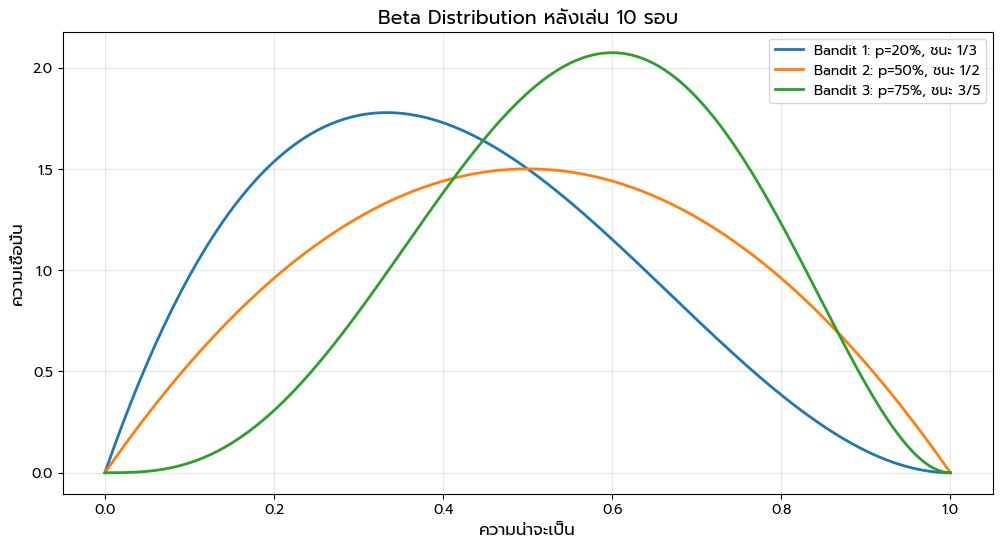

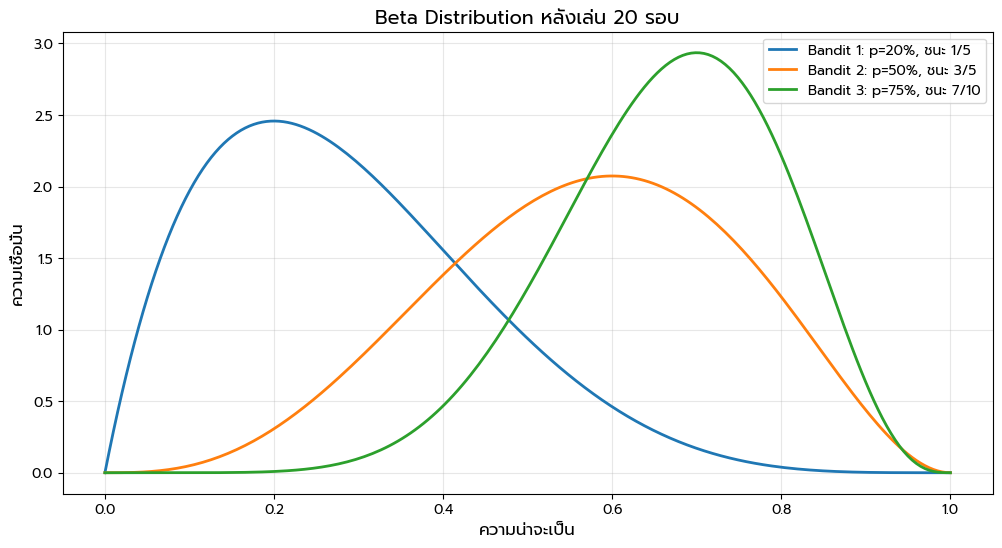

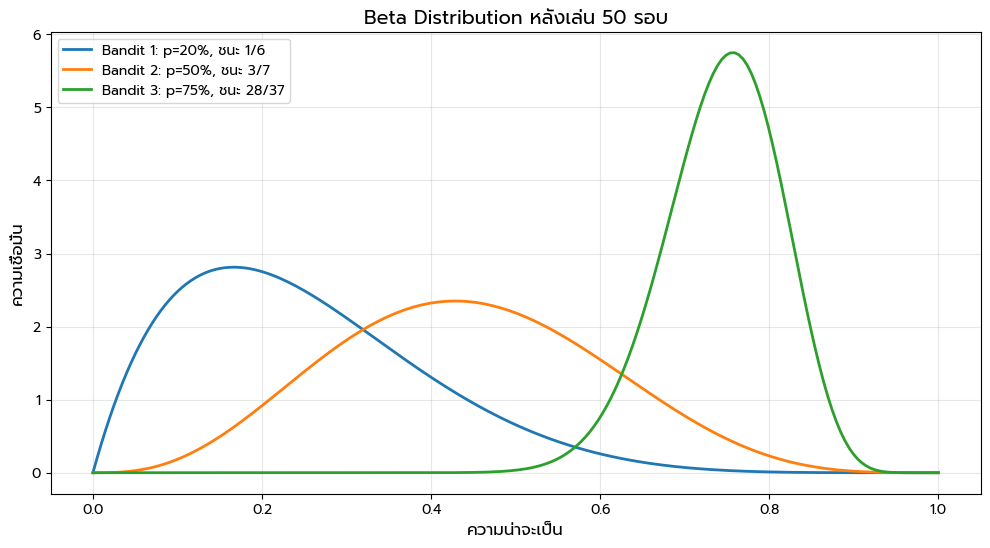

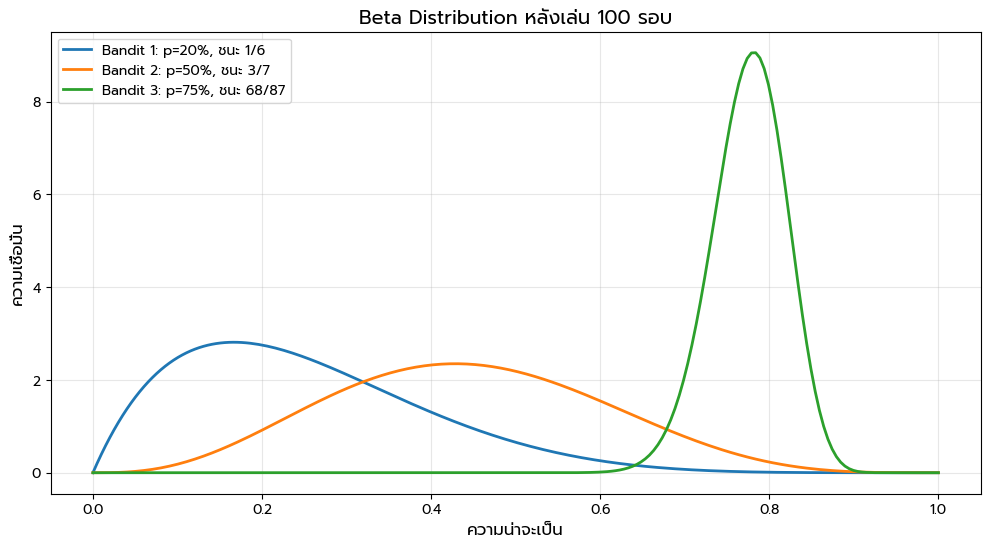

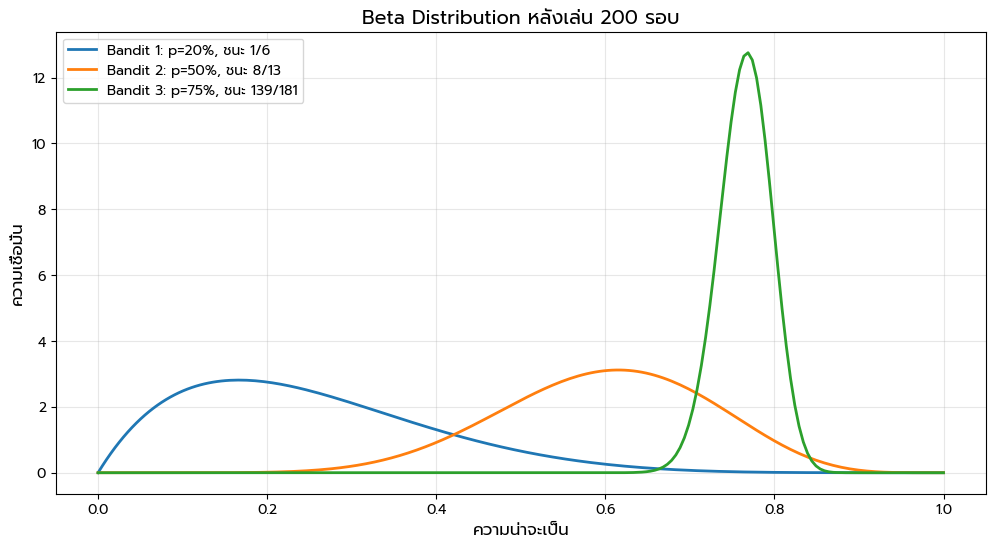

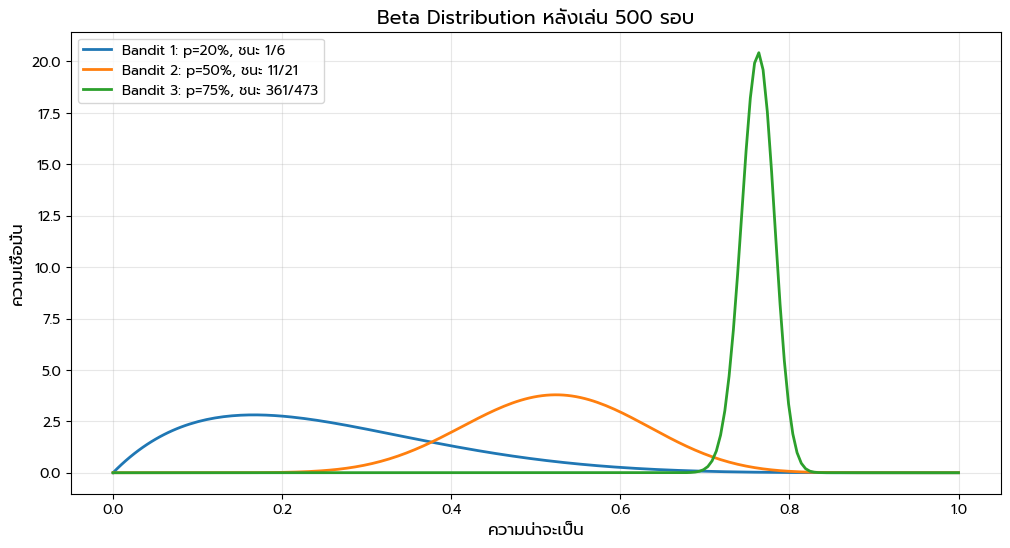

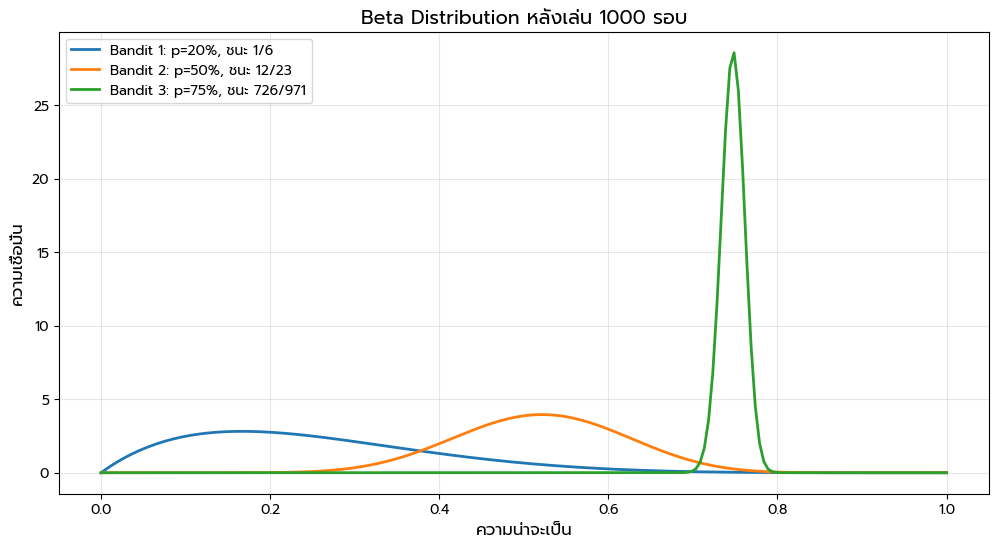

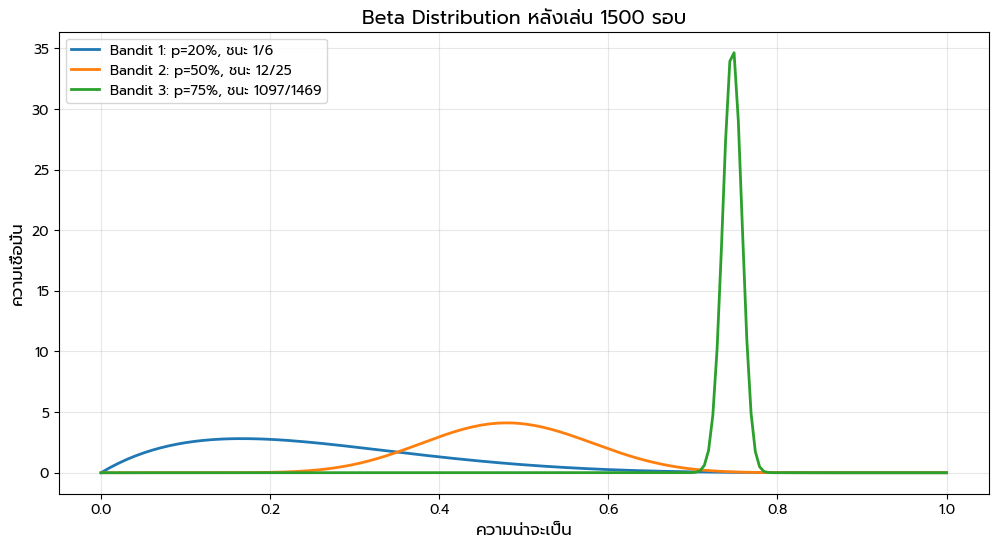

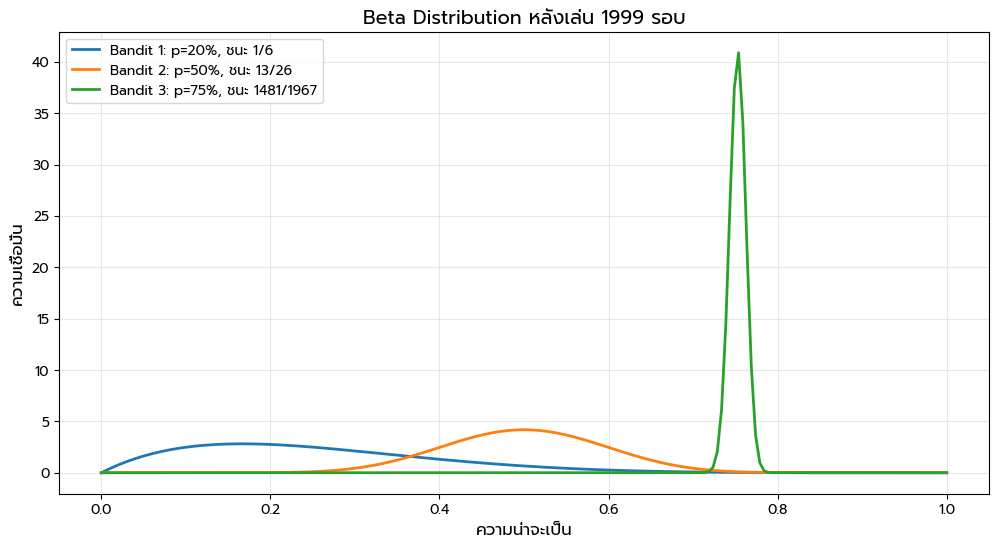


📊 สรุปผลการทดลอง
💰 รางวัลรวมทั้งหมด: 1496
📈 Win rate โดยรวม: 74.80%

🎰 จำนวนครั้งที่เลือกแต่ละ Bandit:
  Bandit 1 (p=20%): 6 ครั้ง (0.3%)
  Bandit 2 (p=50%): 26 ครั้ง (1.3%)
  Bandit 3 (p=75%): 1968 ครั้ง (98.4%)

💡 สังเกต: Bandit 3 (p=75%) ควรถูกเลือกมากที่สุด!


In [6]:
# รันการทดลอง
experiment()

## 🎓 Step 7: สรุปการเติม TODO ทั้งหมด

มาดูว่าเราเติม TODO อะไรบ้าง:

### ✅ TODO #1-2: กำหนดค่าเริ่มต้น
```python
self.a = 1  # เริ่มต้นด้วย a = 1
self.b = 1  # เริ่มต้นด้วย b = 1
```
**เหตุผล**: Beta(1,1) = Uniform → เราไม่รู้อะไรเลย

### ✅ TODO #3: สุ่มจาก Beta Distribution
```python
return beta.rvs(self.a, self.b)
```
**เหตุผล**: ใช้ `rvs()` (random variates) สุ่มค่าจาก Beta(a, b)

### ✅ TODO #4-5: อัพเดทความเชื่อ
```python
self.a += x         # ถ้าชนะ (x=1) → a เพิ่ม 1
self.b += (1 - x)   # ถ้าแพ้ (x=0) → b เพิ่ม 1
```
**เหตุผล**: 
- `a` = จำนวนความสำเร็จ + 1
- `b` = จำนวนความล้มเหลว + 1

### ✅ TODO #6: Thompson Sampling
```python
j = np.argmax([b.sample() for b in bandits])
```
**เหตุผล**: 
1. `[b.sample() for b in bandits]` → สุ่มทายทุกตัว
2. `np.argmax()` → เลือก index ที่สุ่มได้สูงสุด

---

## 🧠 Step 8: ทำความเข้าใจเชิงลึก

### 🔑 แนวคิดสำคัญที่ต้องเข้าใจ:

#### 1. **Beta Distribution เป็น Conjugate Prior**
- **Prior**: Beta(a, b)
- **Likelihood**: Bernoulli(p)
- **Posterior**: Beta(a + wins, b + losses)
- **ข้อดี**: อัพเดทง่าย แค่บวก a หรือ b!

#### 2. **Thompson Sampling Balance Explore-Exploit**
- **Explore**: สุ่มได้หลากหลาย → ลองตัวใหม่
- **Exploit**: สุ่มได้ค่าสูง → เลือกตัวดี
- **Magic**: ยิ่งมีข้อมูลมาก → ความไม่แน่ใจลด → เลือกตัวดีมากขึ้น

#### 3. **ทำไมต้องใช้ beta.rvs() ไม่ใช่ np.random.beta()?**
```python
# ทั้งสองทำงานเหมือนกัน!
beta.rvs(a, b)           # จาก scipy.stats
np.random.beta(a, b)     # จาก numpy
```
เลือกอันไหนก็ได้ แต่เราใช้ `beta.rvs()` เพราะ import `beta` มาแล้ว

#### 4. **ทำไม update ใช้ x และ (1-x)?**
```python
# ถ้า x = True (1):
self.a += 1      # a เพิ่ม
self.b += 0      # b ไม่เพิ่ม

# ถ้า x = False (0):
self.a += 0      # a ไม่เพิ่ม
self.b += 1      # b เพิ่ม
```
**Smart!** ใช้ boolean arithmetic แทน if-else

---

## 🎯 Step 9: ทดลองเพิ่มเติม

ลองปรับแต่งโค้ดเพื่อทดลองสถานการณ์ต่าง ๆ

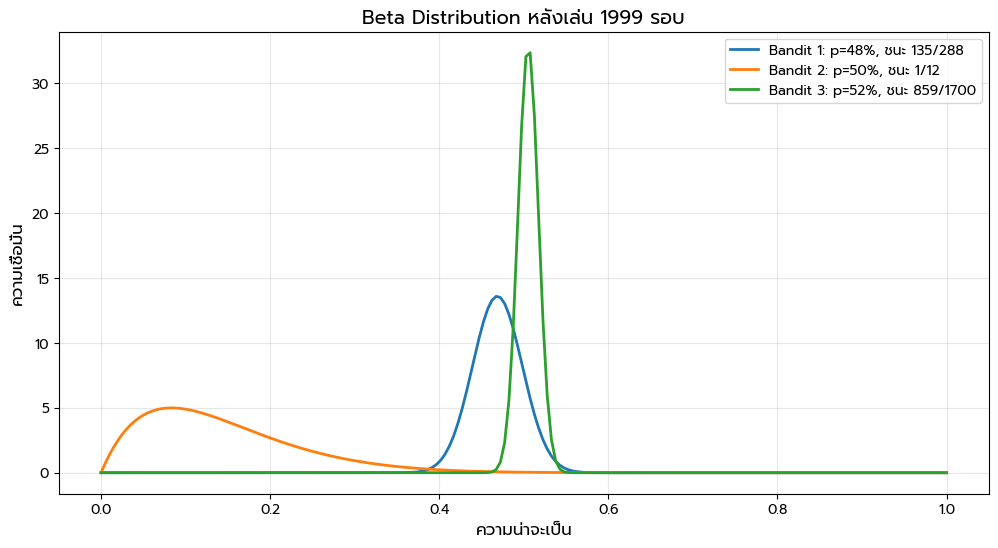


🧪 ทดลอง: Bandits ที่ใกล้เคียงกัน (0.48, 0.50, 0.52)
จำนวนครั้งที่เลือก: [288, 12, 1700]
💡 สังเกต: ใช้เวลานานกว่าจะแยกแยะได้ว่าตัวไหนดีกว่า!


In [7]:
# ทดลอง 1: ถ้า bandits มี p ใกล้เคียงกันมากจะเกิดอะไรขึ้น?
def experiment_similar_bandits():
    """ทดลองกับ bandits ที่มี p ใกล้เคียงกัน"""
    BANDIT_PROBABILITIES = [0.48, 0.50, 0.52]  # ต่างกันแค่ 2%!
    NUM_TRIALS = 2000
    
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)
        
        if i == 1999:
            plot(bandits, i)
    
    print("\n🧪 ทดลอง: Bandits ที่ใกล้เคียงกัน (0.48, 0.50, 0.52)")
    print(f"จำนวนครั้งที่เลือก: {[b.N for b in bandits]}")
    print("💡 สังเกต: ใช้เวลานานกว่าจะแยกแยะได้ว่าตัวไหนดีกว่า!")

# เรียกใช้ฟังก์ชัน
experiment_similar_bandits()

In [8]:
# ทดลอง 2: เปรียบเทียบกับ Greedy Algorithm
def experiment_greedy():
    """เปรียบเทียบ Thompson Sampling กับ Greedy"""
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
    NUM_TRIALS = 2000
    
    # Thompson Sampling
    bandits_ts = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards_ts = []
    
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits_ts])
        x = bandits_ts[j].pull()
        rewards_ts.append(x)
        bandits_ts[j].update(x)
    
    # Greedy (เลือกตัวที่ win rate สูงสุดเสมอ)
    bandits_greedy = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards_greedy = []
    
    # Explore แรก 30 ครั้ง (เล่นทุกตัวเท่า ๆ กัน)
    for i in range(30):
        j = i % 3
        x = bandits_greedy[j].pull()
        rewards_greedy.append(x)
        bandits_greedy[j].update(x)
    
    # หลังจากนั้น exploit เฉพาะตัวดีที่สุด
    for i in range(30, NUM_TRIALS):
        # เลือกตัวที่มี win rate สูงสุด
        win_rates = [(b.a - 1) / b.N if b.N > 0 else 0 for b in bandits_greedy]
        j = np.argmax(win_rates)
        x = bandits_greedy[j].pull()
        rewards_greedy.append(x)
        bandits_greedy[j].update(x)
    
    print("\n📊 เปรียบเทียบ Thompson Sampling vs Greedy")
    print(f"Thompson Sampling: รางวัลรวม = {sum(rewards_ts):.0f}")
    print(f"Greedy Algorithm:  รางวัลรวม = {sum(rewards_greedy):.0f}")
    print(f"\nจำนวนครั้งที่เลือกแต่ละ Bandit:")
    print(f"  Thompson: {[b.N for b in bandits_ts]}")
    print(f"  Greedy:   {[b.N for b in bandits_greedy]}")
    print("\n💡 Thompson Sampling มักได้รางวัลมากกว่า!")

# เรียกใช้ฟังก์ชัน
experiment_greedy()


📊 เปรียบเทียบ Thompson Sampling vs Greedy
Thompson Sampling: รางวัลรวม = 1476
Greedy Algorithm:  รางวัลรวม = 1026

จำนวนครั้งที่เลือกแต่ละ Bandit:
  Thompson: [4, 32, 1964]
  Greedy:   [10, 1980, 10]

💡 Thompson Sampling มักได้รางวัลมากกว่า!


## 🎉 สรุป: สิ่งที่เราได้เรียนรู้

### ✅ ความรู้ที่ได้:

1. **เติม TODO ได้ถูกต้อง 5 จุด**
   - กำหนด a=1, b=1 (uninformative prior)
   - สุ่มจาก Beta ด้วย `beta.rvs()`
   - อัพเดท a, b ตามผลลัพธ์
   - เลือก bandit ด้วย Thompson Sampling

2. **เข้าใจ Beta-Bernoulli Conjugate**
   - Prior × Likelihood = Posterior
   - Beta(a,b) → สังเกตผล → Beta(a+win, b+loss)
   - อัพเดทง่าย ไม่ต้องคำนวณซับซ้อน

3. **เข้าใจ Thompson Sampling**
   - สุ่มทายจาก posterior
   - เลือกตัวที่สุ่มได้สูงสุด
   - Balance exploration-exploitation อัตโนมัติ

4. **ได้ลองทดสอบสถานการณ์ต่าง ๆ**
   - Bandits ที่ใกล้เคียงกัน
   - เปรียบเทียบกับ Greedy

### 🚀 Next Steps:

1. **ลองปรับค่าต่าง ๆ**:
   - เปลี่ยน `BANDIT_PROBABILITIES`
   - เปลี่ยน `NUM_TRIALS`
   - ลอง prior อื่น (เช่น a=2, b=2)

2. **ขยายความรู้**:
   - ลองทำ `bayesian_normal.py` (continuous rewards)
   - เรียนรู้ UCB (Upper Confidence Bound)
   - ศึกษา Contextual Bandits

3. **ประยุกต์ใช้จริง**:
   - A/B Testing บนเว็บไซต์
   - โฆษณาออนไลน์ (ad bidding)
   - Recommendation Systems

---

## 🎊 ยินดีด้วย!

คุณทำ **Bayesian Starter** สำเร็จแล้ว!  
ตอนนี้คุณสามารถเขียน Thompson Sampling ด้วยตัวเองได้แล้ว! 💪

**Remember**: 
> "The best way to learn is to build it yourself!" 🛠️

---